In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df= pd.read_csv('/content/DataScience_salaries_2024.csv')
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2021,MI,FT,Data Scientist,30400000,CLP,40038,CL,100,CL,L
1,2021,MI,FT,BI Data Analyst,11000000,HUF,36259,HU,50,US,L
2,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L
3,2021,MI,FT,ML Engineer,8500000,JPY,77364,JP,50,JP,S
4,2022,SE,FT,Lead Machine Learning Engineer,7500000,INR,95386,IN,50,IN,L
...,...,...,...,...,...,...,...,...,...,...,...
14833,2022,MI,FT,Business Intelligence Developer,15000,USD,15000,GH,100,GH,M
14834,2020,EX,FT,Staff Data Analyst,15000,USD,15000,NG,0,CA,M
14835,2021,EN,FT,Machine Learning Developer,15000,USD,15000,TH,100,TH,L
14836,2022,EN,FT,Data Analyst,15000,USD,15000,ID,0,ID,L


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14838 entries, 0 to 14837
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           14838 non-null  int64 
 1   experience_level    14838 non-null  object
 2   employment_type     14838 non-null  object
 3   job_title           14838 non-null  object
 4   salary              14838 non-null  int64 
 5   salary_currency     14838 non-null  object
 6   salary_in_usd       14838 non-null  int64 
 7   employee_residence  14838 non-null  object
 8   remote_ratio        14838 non-null  int64 
 9   company_location    14838 non-null  object
 10  company_size        14838 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.2+ MB


In [ ]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,14838.000000,1.483800e+04,14838.000000,14838.000000
mean,2023.138900,1.650227e+05,149874.718763,32.760480
std,0.700799,3.562354e+05,69009.181349,46.488278
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2023.000000,1.021000e+05,102000.000000,0.000000
50%,2023.000000,1.422000e+05,141300.000000,0.000000
75%,2024.000000,1.875000e+05,185900.000000,100.000000
max,2024.000000,3.040000e+07,800000.000000,100.000000


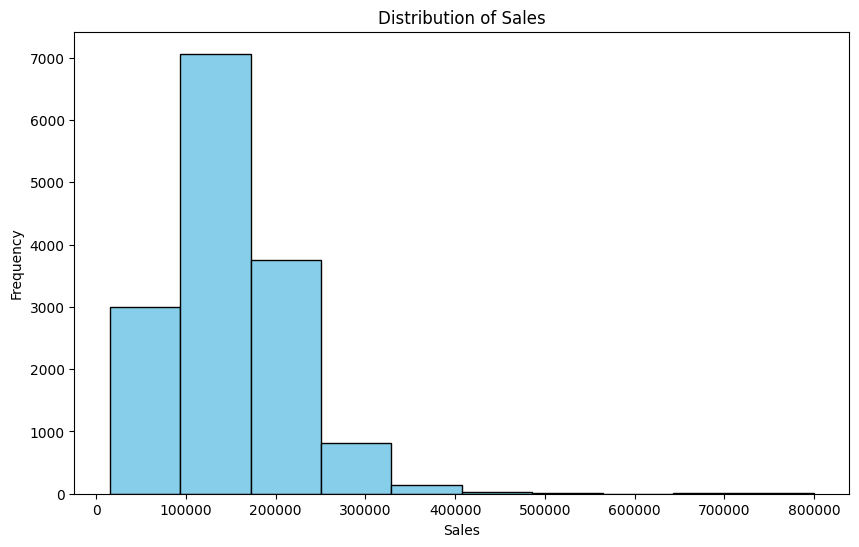

In [ ]:
plt.figure(figsize=(10,6))
plt.hist(df['salary_in_usd'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

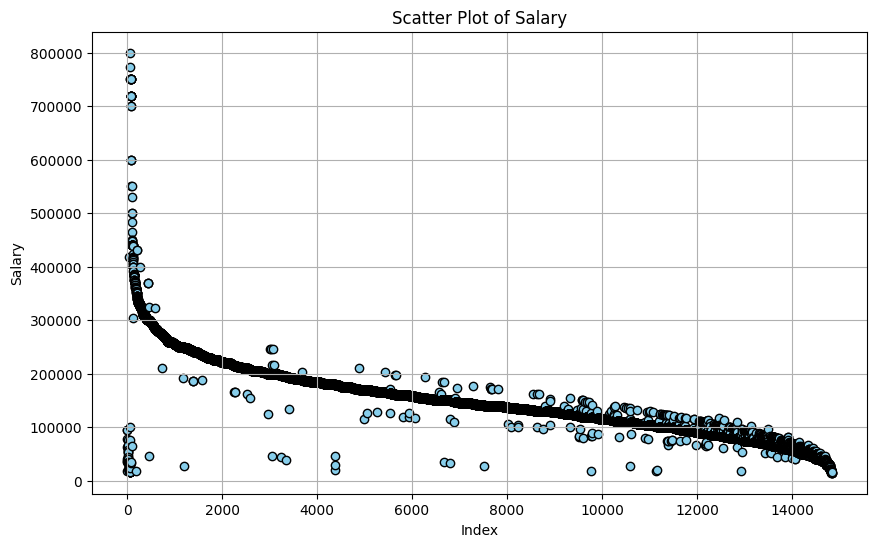

In [ ]:
# Crear un gráfico de dispersión de la columna "salary"
plt.figure(figsize=(10, 6))
plt.scatter(range(len(df)), df['salary_in_usd'], color='skyblue', edgecolor='black')
plt.title('Scatter Plot of Salary')
plt.xlabel('Index')
plt.ylabel('Salary')
plt.grid(True)
plt.show()

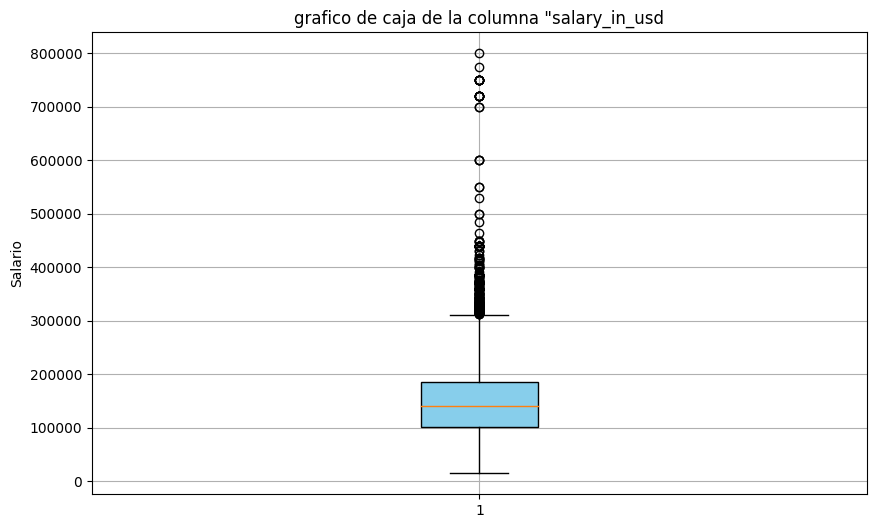

In [ ]:
# Crear un diagrama de caja de la columna "salary"
plt.figure(figsize=(10, 6))
plt.boxplot(df['salary_in_usd'], patch_artist=True, boxprops=dict(facecolor='skyblue', color='black'))
plt.title('grafico de caja de la columna "salary_in_usd')
plt.ylabel('Salario')
plt.grid(True)
plt.show()

### Normalización Min-Max


In [ ]:
datos_norm = (df['salary_in_usd']-df['salary_in_usd'].min())/(df['salary_in_usd'].max()-df['salary_in_usd'].min())
print(datos_norm)

0        0.031896
1        0.027082
2        0.026414
3        0.079445
4        0.102403
           ...   
14833    0.000000
14834    0.000000
14835    0.000000
14836    0.000000
14837    0.001231
Name: salary_in_usd, Length: 14838, dtype: float64


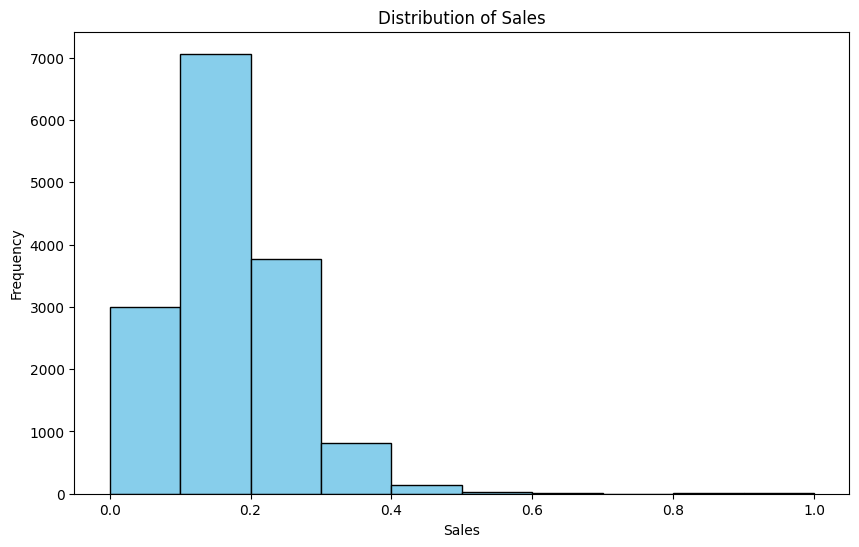

In [ ]:
plt.figure(figsize=(10,6))
plt.hist( datos_norm, bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

### Regla 2- sigma


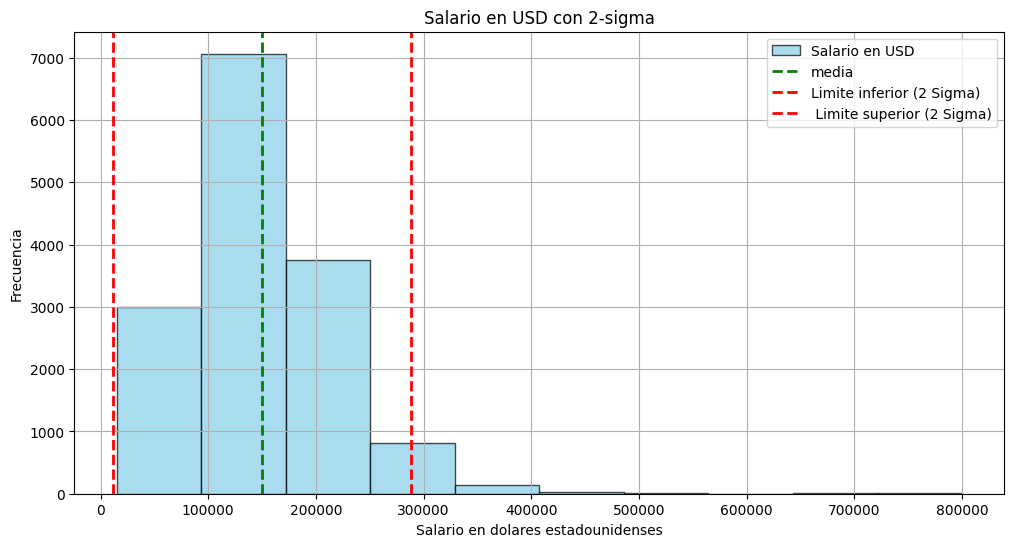

In [ ]:
# Calcular la media y la desviación estándar
media_salario = df['salary_in_usd'].mean()
std_salario = df['salary_in_usd'].std()

# Calcular los límites según la regla de dos sigma
lower_bound = media_salario - 2 * std_salario
upper_bound = media_salario + 2 * std_salario

# Identificar los valores atípicos
df['outlier'] = (df['salary_in_usd'] < lower_bound) | (df['salary_in_usd'] > upper_bound)

# Graficar el histograma de los salarios con los límites de dos sigma
plt.figure(figsize=(12, 6))
plt.hist(df['salary_in_usd'], bins=10, color='skyblue', edgecolor='black', alpha=0.7, label='Salario en USD')
plt.axvline(media_salario, color='green', linestyle='--', linewidth=2, label='media')
plt.axvline(lower_bound, color='red', linestyle='--', linewidth=2, label='Limite inferior (2 Sigma)')
plt.axvline(upper_bound, color='red', linestyle='--', linewidth=2, label=' Limite superior (2 Sigma)')
plt.title('Salario en USD con 2-sigma')
plt.xlabel('Salario en dolares estadounidenses')
plt.ylabel('Frecuencia')
plt.legend()
plt.grid(True)
plt.show()

### One Hot Encoding

In [ ]:
# Suponiendo que 'job_title' es una columna en tu DataFrame 'df'
job_titles = df['company_location'].unique()  # Obtener los valores únicos de la columna 'job_title'
ohe_columns = {}

# Crear columnas de one hot encoding para cada valor único de 'job_title'
for title in job_titles:
    ohe_columns[title] = []

# Llenar las columnas de one hot encoding
for index, row in df.iterrows():
    for title in job_titles:
        if row['company_location'] == title:
            ohe_columns[title].append(1)
        else:
            ohe_columns[title].append(0)

# Crear un nuevo DataFrame con las columnas de one hot encoding
ohe_df = pd.DataFrame(ohe_columns)

# Mostrar el nuevo DataFrame
ohe_df


,CL,US,HU,JP,IN,ID,DE,CH,IL,SG,...,AD,OM,BS,CF,PK,MY,GH,HN,MD,EC
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14833,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
14834,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14835,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14836,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Transformación Cox-box


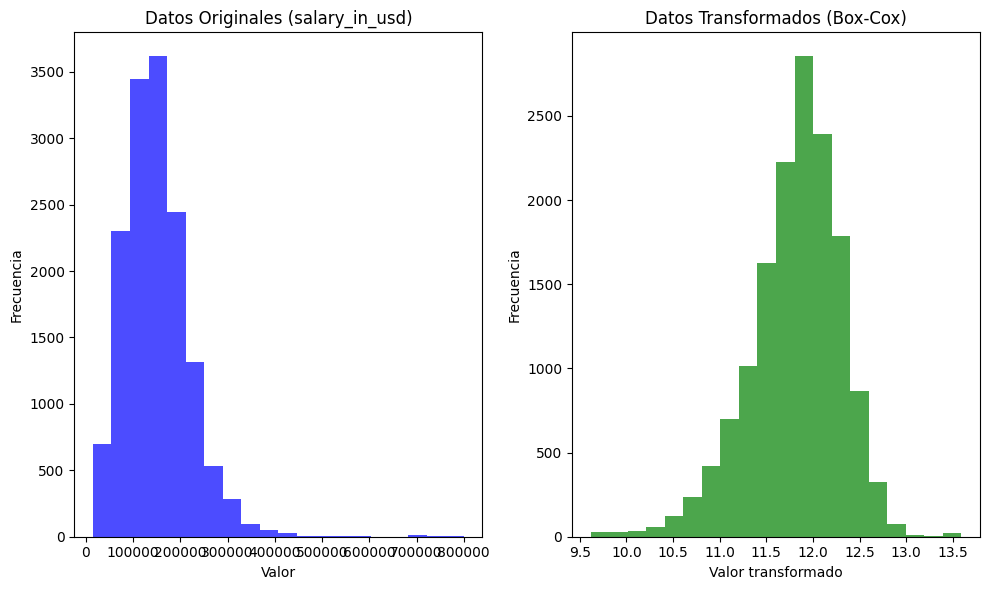

In [ ]:
import numpy as np

# Suponiendo que 'salary_in_usd' es la variable que deseas transformar en tu DataFrame 'df'
salary_data = df['salary_in_usd']

# Verificar si todos los valores son positivos (Box-Cox solo se aplica a valores positivos)
if all(salary_data > 0):
    # Calcular la transformación de Box-Cox
    transformed_data = np.log(salary_data)
else:
    raise ValueError("No se pueden aplicar transformaciones de Box-Cox a datos no positivos")
# Graficar los datos originales y transformados
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.hist(salary_data, bins=20, color='blue', alpha=0.7)
plt.title('Datos Originales (salary_in_usd)')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
plt.hist(transformed_data, bins=20, color='green', alpha=0.7)
plt.title('Datos Transformados (Box-Cox)')
plt.xlabel('Valor transformado')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()


# **Imputación mediana**

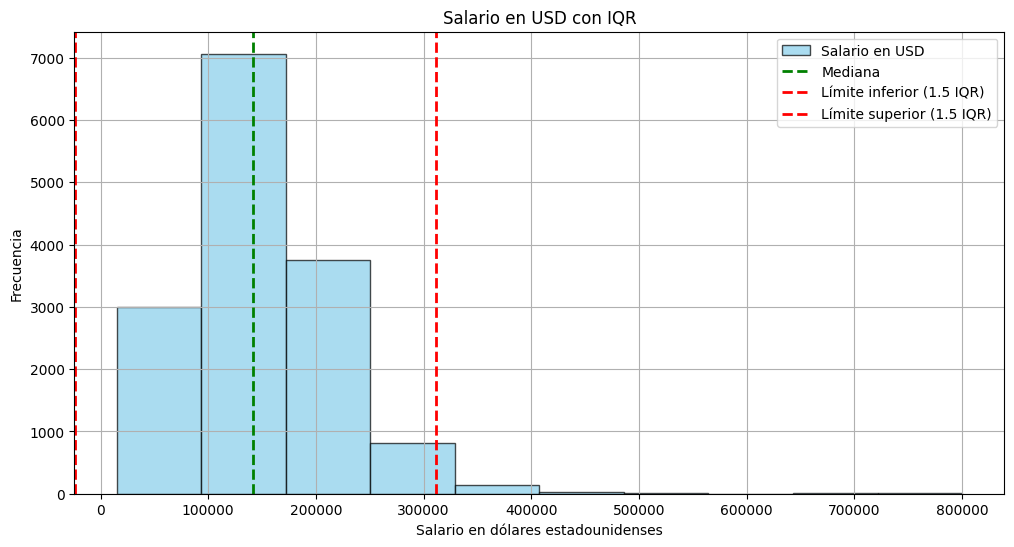

In [ ]:
# Calcula la mediana
median_salary = df['salary_in_usd'].median()

# Reemplaza los valores faltantes con la mediana
df['salary_in_usd'].fillna(median_salary, inplace=True)

# Calcula el IQR
Q1 = df['salary_in_usd'].quantile(0.25)
Q3 = df['salary_in_usd'].quantile(0.75)
IQR = Q3 - Q1

# Identifica valores atípicos usando el IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['salary_in_usd'] < lower_bound) | (df['salary_in_usd'] > upper_bound)]

# Graficar el histograma con los límites del IQR
plt.figure(figsize=(12, 6))
plt.hist(df['salary_in_usd'], bins=10, color='skyblue', edgecolor='black', alpha=0.7, label='Salario en USD')
plt.axvline(median_salary, color='green', linestyle='--', linewidth=2, label='Mediana')
plt.axvline(lower_bound, color='red', linestyle='--', linewidth=2, label='Límite inferior (1.5 IQR)')
plt.axvline(upper_bound, color='red', linestyle='--', linewidth=2, label='Límite superior (1.5 IQR)')
plt.title('Salario en USD con IQR')
plt.xlabel('Salario en dólares estadounidenses')
plt.ylabel('Frecuencia')
plt.legend()
plt.grid(True)
plt.show()



### clasificador